<a href="https://colab.research.google.com/github/JulieOnIsland/Data-Analytics/blob/main/%ED%8C%90%EB%8B%A4%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumGothic')             
mpl.rcParams['axes.unicode_minus'] = False 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
dpath='/content/drive/MyDrive/data/'

-한국복지패널데이터 분석 출처: 데이터 시각화 with 파이썬

-서울시 구별 CCTV 현황 분석 출처: 파이썬으로 데이터 주무르기

-일자리와 부동산 관계 분석 출처: 파이썬으로 데이터 주무르기

# 한국복지패널데이터

## 데이터 읽기

In [33]:
df = pd.read_csv(dpath + 'welfare_python.csv')
df.head()

,gender,birth,marriage,religion,code_job,income,code_region
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,942.0,120.0,1
3,1,1942,3,1,762.0,200.0,1
4,2,1923,2,1,NaN,NaN,1


In [34]:
job =  pd.read_csv(dpath + 'welfare_job.csv', encoding='CP949')
job.head()

,code_job,job
0,111,의회의원 고위공무원 및 공공단체임원
1,112,기업고위임원
2,120,행정 및 경영지원 관리자
3,131,연구 교육 및 법률 관련 관리자
4,132,보험 및 금융 관리자


## 데이터 전처리

In [35]:
# gender2 신규 컬럼 생성
dic = {1: '남성', 2:'여성'}
df['gender2'] = [dic[i] for i in df.gender]
df.head()

,gender,birth,marriage,religion,code_job,income,code_region,gender2
0,2,1936,2,2,NaN,NaN,1,여성
1,2,1945,2,2,NaN,NaN,1,여성
2,1,1948,2,2,942.0,120.0,1,남성
3,1,1942,3,1,762.0,200.0,1,남성
4,2,1923,2,1,NaN,NaN,1,여성


In [36]:
# marriage2 신규 컬럼 생성
def recoding(x):
    if x == 1:
        return '결혼'
    elif x == 3:
        return '이혼'
    else:
        return '그외'

df['marriage2'] = df.marriage.apply(recoding)
df.head()

,gender,birth,marriage,religion,code_job,income,code_region,gender2,marriage2
0,2,1936,2,2,NaN,NaN,1,여성,그외
1,2,1945,2,2,NaN,NaN,1,여성,그외
2,1,1948,2,2,942.0,120.0,1,남성,그외
3,1,1942,3,1,762.0,200.0,1,남성,이혼
4,2,1923,2,1,NaN,NaN,1,여성,그외


In [37]:
df = pd.merge(df, job, on='code_job')
df.head()

,gender,birth,marriage,religion,code_job,income,code_region,gender2,marriage2,job
0,1,1948,2,2,942.0,120.0,1,남성,그외,경비원 및 검표원
1,1,1945,3,2,942.0,220.2,1,남성,이혼,경비원 및 검표원
2,1,1946,1,2,942.0,139.0,1,남성,결혼,경비원 및 검표원
3,1,1953,1,2,942.0,150.0,1,남성,결혼,경비원 및 검표원
4,1,1960,1,1,942.0,166.0,1,남성,결혼,경비원 및 검표원


In [38]:
# region 신규 컬럼 생성
df.code_region.value_counts()
def region(x):
    if x==1:
        return '서울'
    elif x==2:
        return '인천/경기'
    elif x==3:
        return '부산/경남/울산'
    elif x==4:
        return '대구/경북'
    elif x==5:
        return '대전/충남'
    elif x==6:
        return '강원/충북'
    else:
        return '광주/전남/전북/제주'

df['region'] = df.code_region.apply(region)
df.head()

,gender,birth,marriage,religion,code_job,income,code_region,gender2,marriage2,job,region
0,1,1948,2,2,942.0,120.0,1,남성,그외,경비원 및 검표원,서울
1,1,1945,3,2,942.0,220.2,1,남성,이혼,경비원 및 검표원,서울
2,1,1946,1,2,942.0,139.0,1,남성,결혼,경비원 및 검표원,서울
3,1,1953,1,2,942.0,150.0,1,남성,결혼,경비원 및 검표원,서울
4,1,1960,1,1,942.0,166.0,1,남성,결혼,경비원 및 검표원,서울


In [39]:
# age 신규 컬럼 생성
import datetime
dt_now = datetime.datetime.now()
dt_now
dt_now.year

df['age'] = dt_now.year - df.birth
df.head()

,gender,birth,marriage,religion,code_job,income,code_region,gender2,marriage2,job,region,age
0,1,1948,2,2,942.0,120.0,1,남성,그외,경비원 및 검표원,서울,73
1,1,1945,3,2,942.0,220.2,1,남성,이혼,경비원 및 검표원,서울,76
2,1,1946,1,2,942.0,139.0,1,남성,결혼,경비원 및 검표원,서울,75
3,1,1953,1,2,942.0,150.0,1,남성,결혼,경비원 및 검표원,서울,68
4,1,1960,1,1,942.0,166.0,1,남성,결혼,경비원 및 검표원,서울,61


In [40]:
# religion2 신규 컬럼 생성
df['religion2'] = ['종교있음' if i==1 else '종교없음' for i in df.religion]
df.head()
df.religion2.value_counts()

종교없음    3957
종교있음    3572
Name: religion2, dtype: int64

In [41]:
# income 컬럼 결측치를 평균으로 채워넣기
df['income2'] = df.income.fillna(df.income.mean())
df.head()

,gender,birth,marriage,religion,code_job,income,code_region,gender2,marriage2,job,region,age,religion2,income2
0,1,1948,2,2,942.0,120.0,1,남성,그외,경비원 및 검표원,서울,73,종교없음,120.0
1,1,1945,3,2,942.0,220.2,1,남성,이혼,경비원 및 검표원,서울,76,종교없음,220.2
2,1,1946,1,2,942.0,139.0,1,남성,결혼,경비원 및 검표원,서울,75,종교없음,139.0
3,1,1953,1,2,942.0,150.0,1,남성,결혼,경비원 및 검표원,서울,68,종교없음,150.0
4,1,1960,1,1,942.0,166.0,1,남성,결혼,경비원 및 검표원,서울,61,종교있음,166.0


In [42]:
# agegroup 컬럼 추가
def age_identify(x):
    if x < 30:
        return '청년'
    elif x >= 30 and x < 60:         #사실 30세 미만인 것은 이미 걸러졌기 때문에 elif x<60 이렇게만 해도 됨
        return '중년'
    else:
        return '노년'
df['agegroup'] = df.age.apply(age_identify) 
df.head()

,gender,birth,marriage,religion,code_job,income,code_region,gender2,marriage2,job,region,age,religion2,income2,agegroup
0,1,1948,2,2,942.0,120.0,1,남성,그외,경비원 및 검표원,서울,73,종교없음,120.0,노년
1,1,1945,3,2,942.0,220.2,1,남성,이혼,경비원 및 검표원,서울,76,종교없음,220.2,노년
2,1,1946,1,2,942.0,139.0,1,남성,결혼,경비원 및 검표원,서울,75,종교없음,139.0,노년
3,1,1953,1,2,942.0,150.0,1,남성,결혼,경비원 및 검표원,서울,68,종교없음,150.0,노년
4,1,1960,1,1,942.0,166.0,1,남성,결혼,경비원 및 검표원,서울,61,종교있음,166.0,노년


In [43]:
# 범주형 변수로 만들기
df.agegroup = pd.Categorical(df.agegroup, categories=['청년', '중년', '노년'])
df.agegroup

0       노년
1       노년
2       노년
3       노년
4       노년
        ..
7524    노년
7525    노년
7526    노년
7527    청년
7528    노년
Name: agegroup, Length: 7529, dtype: category
Categories (3, object): ['청년', '중년', '노년']

In [44]:
# 새로운 데이터프레임
df2 = df[['age', 'agegroup', 'birth', 'gender2', 'marriage2', 'religion2', 'region', 'job', 'income2']]

In [45]:
df2.head()

,age,agegroup,birth,gender2,marriage2,religion2,region,job,income2
0,73,노년,1948,남성,그외,종교없음,서울,경비원 및 검표원,120.0
1,76,노년,1945,남성,이혼,종교없음,서울,경비원 및 검표원,220.2
2,75,노년,1946,남성,결혼,종교없음,서울,경비원 및 검표원,139.0
3,68,노년,1953,남성,결혼,종교없음,서울,경비원 및 검표원,150.0
4,61,노년,1960,남성,결혼,종교있음,서울,경비원 및 검표원,166.0


In [46]:
column_dic = {'age':'연령', 
              'agegroup':'연령대',
              'birth':'생년',
              'gender2':'성별',
              'marriage2':'결혼상태',
              'religion2':'종교유무', 
              'region':'지역',
              'job':'직업',
              'income2':'월소득'}
df2.rename(columns=column_dic, inplace=True)

In [47]:
df2.head()

,연령,연령대,생년,성별,결혼상태,종교유무,지역,직업,월소득
0,73,노년,1948,남성,그외,종교없음,서울,경비원 및 검표원,120.0
1,76,노년,1945,남성,이혼,종교없음,서울,경비원 및 검표원,220.2
2,75,노년,1946,남성,결혼,종교없음,서울,경비원 및 검표원,139.0
3,68,노년,1953,남성,결혼,종교없음,서울,경비원 및 검표원,150.0
4,61,노년,1960,남성,결혼,종교있음,서울,경비원 및 검표원,166.0


## 데이터 시각화

### 결혼상태와 종교유무의 분포

In [48]:
# 결혼상태별 빈도 확인
df2['결혼상태'].value_counts()

결혼    5307
그외    1803
이혼     419
Name: 결혼상태, dtype: int64

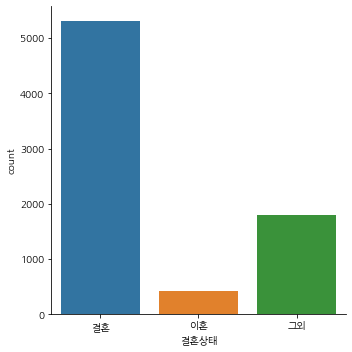

In [49]:
# 빈도막대그래프 그리기
df2['결혼상태'] = pd.Categorical(df2['결혼상태'], categories=['결혼','이혼','그외'])
sns.catplot(kind='count', x='결혼상태', data=df2);

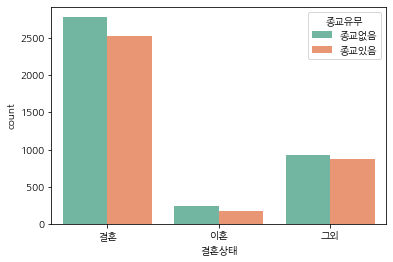

In [52]:
# 결혼상태에 따라 종교유무를 나누어 표기
sns.countplot(x='결혼상태', data=df2, hue='종교유무', palette='Set2');

### 연령 분포

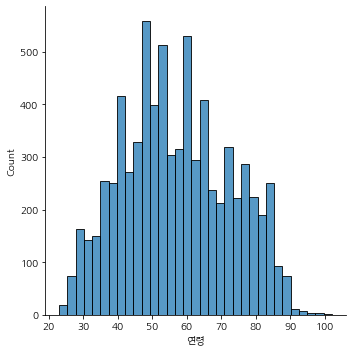

In [53]:
# 연령에 대한 히스토그램
sns.displot(kind='hist', x='연령', data=df2);

### 연령과 소득, 결혼유무 분포

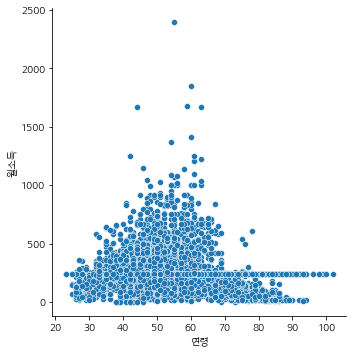

In [54]:
# 연령과 월소득의 산점도
sns.relplot(kind='scatter', x='연령', y='월소득', data=df2);  

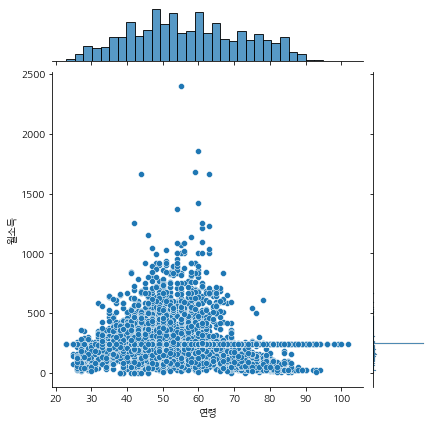

In [55]:
sns.jointplot(x='연령', y='월소득', data=df2);

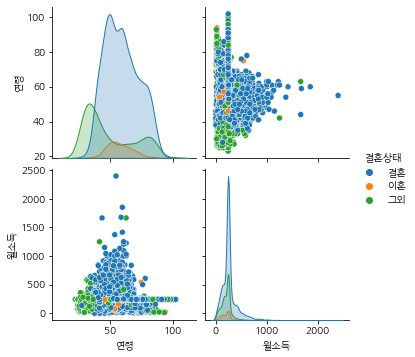

In [59]:
# 연령과 월소득에 대한 pairplot을 결혼상태에 따라 색상을 구분하여 그리기
sns.pairplot(data=df2[['연령', '월소득', '결혼상태']], hue='결혼상태');

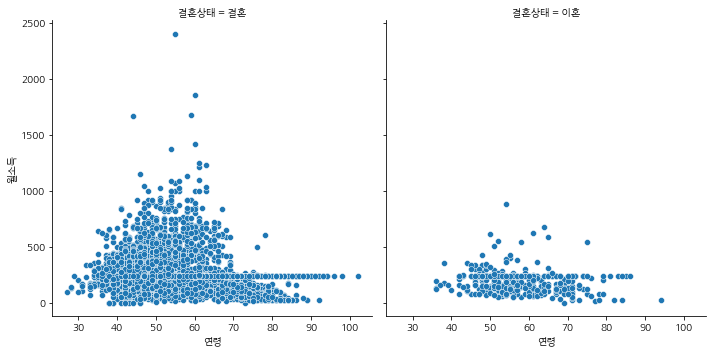

In [61]:
# 연령과 월소득에 대한 산점도를 결혼상태에 따라 나눠서 그리되
# 결혼상태는 결혼과 이혼만 추출해서 그리기
sns.relplot(kind='scatter', x='연령', y='월소득', data=df2.query("결혼상태 == '결혼' | 결혼상태 == '이혼'"), col='결혼상태',
            col_order=['결혼','이혼']);

### 성별과 소득 분포

In [64]:
# 성별에 따른 평균 월소득 계산
df2.groupby('성별')['월소득'].mean()

성별
남성    284.651798
여성    192.135003
Name: 월소득, dtype: float64

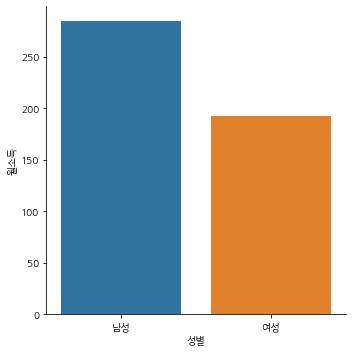

In [68]:
# 성별에 따른 평균 월소득에 대한 평균막대그래프
sns.catplot(kind='bar', x='성별', y='월소득', data=df2, ci=None);

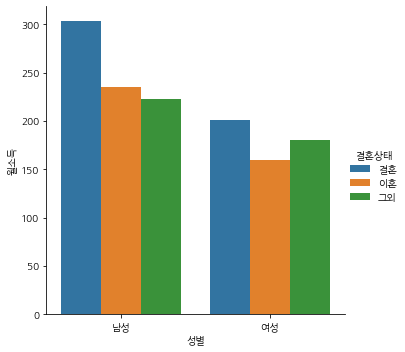

In [69]:
# 성별에 따른 평균 월소득에 대한 평균막대그래프를 결혼상태에 따라 구분한 가로 막대로 그리기
sns.catplot(kind='bar', x='성별', y='월소득', data=df2, ci=None, hue='결혼상태');

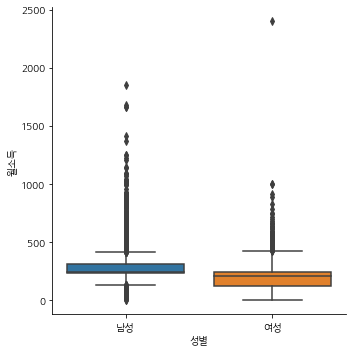

In [70]:
# 성별에 따른 월소득에 대한 박스그림 그리기
sns.catplot(kind='box', x='성별', y='월소득', data=df2);

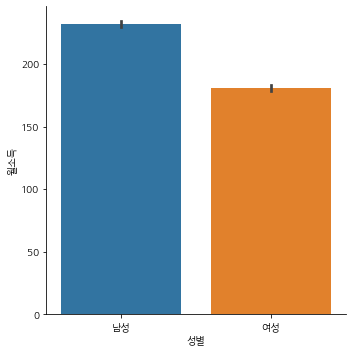

In [71]:
# 성별에 따른 월소득에 대한 박스그림 그리기 (평균 월소득이 400 이하인 개체만 추출)
sns.catplot(kind='bar', x='성별', y='월소득', data=df2.query('400 >= 월소득'));

# 서울시 구별 CCTV 현황 분석

## 데이터 읽기

In [74]:
# CCTV 데이터 읽어오기
df = pd.read_csv(dpath + '서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv',
                 encoding='CP949',skiprows=1, thousands=',')
df.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,77032,7667,2200,3491,4439,6582,8129,9947,9876,11961,11132,1608
1,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
2,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
3,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
4,성동구,3602,448,125,212,105,339,310,874,390,262,461,76


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구분        26 non-null     object
 1   총계        26 non-null     int64 
 2   2012년 이전  26 non-null     int64 
 3   2012년     26 non-null     int64 
 4   2013년     26 non-null     int64 
 5   2014년     26 non-null     int64 
 6   2015년     26 non-null     int64 
 7   2016년     26 non-null     int64 
 8   2017년     26 non-null     int64 
 9   2018년     26 non-null     int64 
 10  2019년     26 non-null     int64 
 11  2020년     26 non-null     int64 
 12  2021년     26 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.8+ KB


In [76]:
df.shape
df = df[df['구분'] !='계']  
df.head()
df.shape

(25, 13)

In [77]:
# 2021년 열 삭제 (인구 데이터가 2020까지 있어서)
df.drop('2021년', axis=1, inplace=True)
df.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,1772,813,0,0,210,150,1,261,85,9,200
2,중 구,2333,16,114,87,77,236,240,372,386,155,361
3,용산구,2383,34,71,234,125,221,298,351,125,307,617
4,성동구,3602,448,125,212,105,339,310,874,390,262,461
5,광진구,2588,35,57,100,187,98,52,675,465,712,175


In [78]:
# 총계를 다시 계산
df['총계'] = df.loc[:, '2012년 이전':'2020년'].sum(axis=1)        
df.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,1729,813,0,0,210,150,1,261,85,9,200
2,중 구,2044,16,114,87,77,236,240,372,386,155,361
3,용산구,2383,34,71,234,125,221,298,351,125,307,617
4,성동구,3526,448,125,212,105,339,310,874,390,262,461
5,광진구,2556,35,57,100,187,98,52,675,465,712,175


In [79]:
# 인구 데이터 읽어오기
# 텍스트 파일이라서 read_table
pop = pd.read_table(dpath + 'report.txt', skiprows=2, thousands=',')
pop.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020,합계,4417954,9911088,4816522,5094566,9668465,4701723,4966742,242623,114799,127824,2.19,1568331
1,2020,종로구,75003,158996,76876,82120,149384,72635,76749,9612,4241,5371,1.99,28507
2,2020,중구,63686,134635,65776,68859,125240,61222,64018,9395,4554,4841,1.97,24495
3,2020,용산구,113093,244645,118835,125810,230040,110722,119318,14605,8113,6492,2.03,40247
4,2020,성동구,135870,300505,146424,154081,293556,143387,150169,6949,3037,3912,2.16,45603


In [80]:
pop = pd.read_table(dpath + 'report.txt', skiprows=2, thousands=',',
                    usecols=['기간','자치구','계','계.1','계.2','65세이상고령자'])
pop.head()

,기간,자치구,계,계.1,계.2,65세이상고령자
0,2020,합계,9911088,9668465,242623,1568331
1,2020,종로구,158996,149384,9612,28507
2,2020,중구,134635,125240,9395,24495
3,2020,용산구,244645,230040,14605,40247
4,2020,성동구,300505,293556,6949,45603


In [81]:
pop.rename(columns={'계':'인구수','계.1':'한국인','계.2':'외국인','65세이상고령자':'고령자'},
           inplace=True)

pop.head()

,기간,자치구,인구수,한국인,외국인,고령자
0,2020,합계,9911088,9668465,242623,1568331
1,2020,종로구,158996,149384,9612,28507
2,2020,중구,134635,125240,9395,24495
3,2020,용산구,244645,230040,14605,40247
4,2020,성동구,300505,293556,6949,45603


In [82]:
# 자치구가 "합계"인 행 삭제
pop = pop[pop['자치구'] != '합계']
pop.head()

,기간,자치구,인구수,한국인,외국인,고령자
1,2020,종로구,158996,149384,9612,28507
2,2020,중구,134635,125240,9395,24495
3,2020,용산구,244645,230040,14605,40247
4,2020,성동구,300505,293556,6949,45603
5,2020,광진구,360109,346682,13427,50560


In [83]:
# 자치구별 데이터 개수 확인
print(pop.groupby('자치구')['기간'].count())
print(pop.shape)

자치구
강남구     1
강동구     1
강북구     1
강서구     1
관악구     1
광진구     1
구로구     1
금천구     1
노원구     1
도봉구     1
동대문구    1
동작구     1
마포구     1
서대문구    1
서초구     1
성동구     1
성북구     1
송파구     1
양천구     1
영등포구    1
용산구     1
은평구     1
종로구     1
중구      1
중랑구     1
Name: 기간, dtype: int64
(25, 6)


In [85]:
pop.describe()

,기간,인구수,한국인,외국인,고령자
count,25.0,25.000000,25.000000,25.000000,25.000000
mean,2020.0,396443.520000,386738.600000,9704.920000,62733.240000
std,0.0,126718.526659,128190.839549,6897.932727,17816.287313
min,2020.0,134635.000000,125240.000000,2104.000000,24495.000000
25%,2020.0,322952.000000,312173.000000,4208.000000,54204.000000
50%,2020.0,401572.000000,391220.000000,9395.000000,63422.000000
75%,2020.0,463998.000000,459970.000000,13427.000000,73770.000000
max,2020.0,673926.000000,667960.000000,28080.000000,93483.000000


## 데이터 파악

### CCTV 현황

In [86]:
# CCTV 데이터에서 CCTV 전체개수로 정렬해서 CCTV가 가장 적은 구부터 5개구 확인
df.sort_values('총계').head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
10,도봉구,1298,39,22,96,181,79,159,134,222,198,168
1,종로구,1729,813,0,0,210,150,1,261,85,9,200
2,중 구,2044,16,114,87,77,236,240,372,386,155,361
20,동작구,2286,41,24,25,503,128,253,271,300,322,419
11,노원구,2311,0,97,193,77,516,331,175,216,320,386


In [87]:
# CCTV 데이터에서 CCTV 전체개수로 정렬해서 CCTV가 가장 많은 구부터 5개구 확인
df.sort_values('총계', ascending=False).head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
23,강남구,6501,124,77,75,597,840,1310,999,748,789,942
21,관악구,4908,428,205,291,513,529,621,687,663,640,331
17,구로구,4075,852,216,349,187,268,326,540,488,434,415
19,영등포구,3773,572,136,238,123,209,248,311,658,65,1213
8,성북구,3770,83,78,170,230,323,594,460,867,714,251


In [88]:
# 최근 3년간 CCTV 증가율 계산 (최근 3년간 CCTV 수를 더하고, 최근 3년 이전 CCTV 수로 나누기) 
df['최근3년간CCTV설치수'] = df[['2018년','2019년','2020년']].sum(axis=1)
df['최근3년이전CCTV설치수'] = df.loc[:, '2012년 이전':'2017년'].sum(axis=1)
df['최근3년간CCTV증가율'] = df['최근3년간CCTV설치수'] / df['최근3년이전CCTV설치수'] * 100
df.drop(['최근3년간CCTV설치수', '최근3년이전CCTV설치수'], axis=1, inplace=True)
df.head() 

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,최근3년간CCTV증가율
1,종로구,1729,813,0,0,210,150,1,261,85,9,200,20.487805
2,중 구,2044,16,114,87,77,236,240,372,386,155,361,78.984238
3,용산구,2383,34,71,234,125,221,298,351,125,307,617,78.635682
4,성동구,3526,448,125,212,105,339,310,874,390,262,461,46.125155
5,광진구,2556,35,57,100,187,98,52,675,465,712,175,112.292359


In [89]:
# 최근 3년 CCTV 증가율이 가장 높았던 구부터 5개구 확인
df.sort_values('최근3년간CCTV증가율', ascending=False).head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,최근3년간CCTV증가율
9,강북구,2423,0,0,24,65,105,243,6,392,1000,588,446.952596
24,송파구,2753,72,61,86,85,215,148,241,542,1068,235,203.193833
7,중랑구,3292,302,24,253,88,141,161,162,173,1049,939,191.069850
18,금천구,2365,0,0,178,80,361,133,196,540,369,508,149.472574
12,은평구,3660,14,3,44,332,329,555,403,635,1057,288,117.857143


### 서울시 인구현황

In [90]:
# 구별 외국인비율과 고령자비율 계산
pop.head()
pop['외국인비율'] = pop['외국인'] / pop['인구수'] * 100
pop['고령자비율'] = pop['고령자'] / pop['인구수'] * 100
pop.head()

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,2020,종로구,158996,149384,9612,28507,6.045435,17.929382
2,2020,중구,134635,125240,9395,24495,6.978126,18.193635
3,2020,용산구,244645,230040,14605,40247,5.969875,16.451184
4,2020,성동구,300505,293556,6949,45603,2.312441,15.175455
5,2020,광진구,360109,346682,13427,50560,3.728593,14.040193


In [91]:
# 2020년 기준 인구수가 가장 많은 구부터 5개구 확인
pop.sort_values('인구수', ascending=False).head()

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,2020,송파구,673926,667960,5966,93483,0.885260,13.871404
16,2020,강서구,585901,580185,5716,88984,0.975591,15.187549
23,2020,강남구,544055,539231,4824,75096,0.886675,13.803016
11,2020,노원구,527032,523037,3995,85489,0.758018,16.220837
21,2020,관악구,509803,495060,14743,78875,2.891901,15.471663


In [92]:
# 2020년 기준 외국인 비율이 가장 높은 구부터 5개구 확인
pop.sort_values('외국인비율', ascending=False).head()

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,2020,중구,134635,125240,9395,24495,6.978126,18.193635
19,2020,영등포구,407367,379480,27887,61688,6.845670,15.143102
18,2020,금천구,247835,231733,16102,39842,6.497065,16.076018
17,2020,구로구,432488,404408,28080,70198,6.492666,16.231202
1,2020,종로구,158996,149384,9612,28507,6.045435,17.929382


In [93]:
# 2020년 기준 고령자 비율이 가장 높은 구부터 5개구 확인
pop.sort_values('고령자비율', ascending=False).head()

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,2020,강북구,311569,308055,3514,63422,1.127840,20.355684
10,2020,도봉구,327361,325257,2104,62059,0.642716,18.957359
2,2020,중구,134635,125240,9395,24495,6.978126,18.193635
1,2020,종로구,158996,149384,9612,28507,6.045435,17.929382
12,2020,은평구,484043,479835,4208,85187,0.869344,17.599056


## 데이터 병합

In [94]:
x = df.loc[:, '2012년 이전':'2020년'].columns
x

Index(['2012년 이전', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년',
       '2018년', '2019년', '2020년'],
      dtype='object')

In [95]:
df.drop(x, axis=1, inplace=True)
df.head()

,구분,총계,최근3년간CCTV증가율
1,종로구,1729,20.487805
2,중 구,2044,78.984238
3,용산구,2383,78.635682
4,성동구,3526,46.125155
5,광진구,2556,112.292359


In [96]:
# 두 데이터 병합
final = pd.merge(df, pop, left_on='구분', right_on='자치구')
final.head()

,구분,총계,최근3년간CCTV증가율,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1729,20.487805,2020,종로구,158996,149384,9612,28507,6.045435,17.929382
1,용산구,2383,78.635682,2020,용산구,244645,230040,14605,40247,5.969875,16.451184
2,성동구,3526,46.125155,2020,성동구,300505,293556,6949,45603,2.312441,15.175455
3,광진구,2556,112.292359,2020,광진구,360109,346682,13427,50560,3.728593,14.040193
4,동대문구,2434,34.847645,2020,동대문구,357014,342837,14177,61796,3.970993,17.309125


In [97]:
# 자치구 컬럼 삭제
final.drop('자치구', axis=1, inplace=True)

In [98]:
# 구 이름을 index로 부여하기
final.set_index('구분', inplace=True)
final.head()

,총계,최근3년간CCTV증가율,기간,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구분,,,,,,,,,
종로구,1729,20.487805,2020,158996,149384,9612,28507,6.045435,17.929382
용산구,2383,78.635682,2020,244645,230040,14605,40247,5.969875,16.451184
성동구,3526,46.125155,2020,300505,293556,6949,45603,2.312441,15.175455
광진구,2556,112.292359,2020,360109,346682,13427,50560,3.728593,14.040193
동대문구,2434,34.847645,2020,357014,342837,14177,61796,3.970993,17.309125


## 데이터 분석

### 상관분석

In [99]:
# CCTV수와 인구수, 고령자비율, 외국인비율 간의 상관관계
final[['총계','인구수','고령자비율','외국인비율']].corr(method='spearman')

,총계,인구수,고령자비율,외국인비율
총계,1.000000,0.473043,-0.393043,0.034783
인구수,0.473043,1.000000,-0.477391,-0.543478
고령자비율,-0.393043,-0.477391,1.000000,0.106087
외국인비율,0.034783,-0.543478,0.106087,1.000000


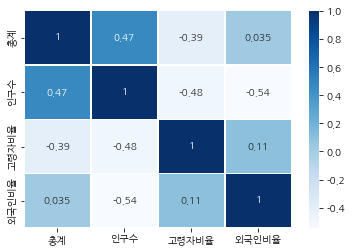

In [100]:
# heatmap으로 나타내기
sns.heatmap(final[['총계','인구수','고령자비율','외국인비율']].corr(method='spearman'), 
            annot=True, linewidth=.5, cmap='Blues');

### 구별 CCTV 현황 그래프

In [101]:
# 총계가 가장 높은 구부터 차례로 도표
final.sort_values('총계', ascending=False, inplace=True)
final.head()

,총계,최근3년간CCTV증가율,기간,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구분,,,,,,,,,
강남구,6501,61.636002,2020,544055,539231,4824,75096,0.886675,13.803016
관악구,4908,49.908369,2020,509803,495060,14743,78875,2.891901,15.471663
구로구,4075,48.831264,2020,432488,404408,28080,70198,6.492666,16.231202
영등포구,3773,105.389222,2020,407367,379480,27887,61688,6.845670,15.143102
성북구,3770,94.530444,2020,447056,437153,9903,73770,2.215159,16.501288


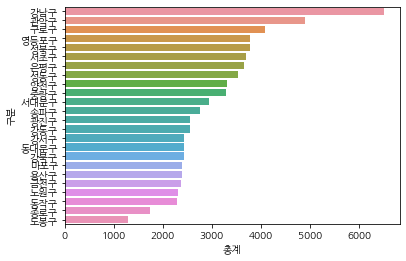

In [102]:
sns.barplot(x='총계', y=final.index, data=final);

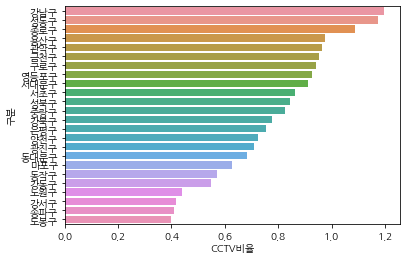

In [103]:
# 인구수 대비 CCTV 개수의 비율을 구하고 가장 높은 구부터 도표
final['CCTV비율'] = final['총계'] / final['인구수'] * 100
final.sort_values('CCTV비율', ascending=False, inplace=True)
sns.barplot(x='CCTV비율', y=final.index, data=final);

### 인구수와 CCTV 관계

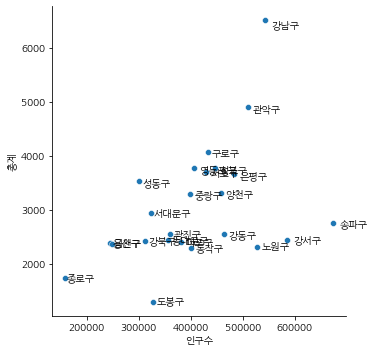

In [104]:
# 인구수 대비 CCTV 수에 대한 산점도 그리기
sns.relplot(x='인구수', y='총계', data=final);

# pyplot의 텍스트 함수 이용해서 텍스트 붙이기
for i in range(final.shape[0]):
    plt.text(x=final['인구수'][i]*1.02, y=final['총계'][i]*0.98, s=final.index[i])

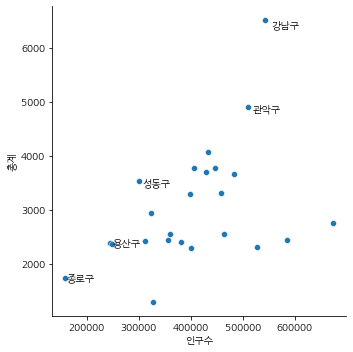

In [105]:
# 인구수 대비 CCTV 수에 대한 산점도 그리기 (인구 수 대비 CCTV가 가장 많은 구부터 5개구만 표기하기)
final.head()
final.sort_values('CCTV비율', ascending=False, inplace=True)
sns.relplot(x='인구수', y='총계', data=final);
for i in range(5):
    plt.text(x=final['인구수'][i]*1.02, y=final['총계'][i]*0.98, s=final.index[i])

# 일자리와 부동산 관계 분석

## 데이터 읽기

In [107]:
# 지역별 일자리 데이터 읽어오기
job = pd.read_csv(dpath + '행정구역_시도__산업별_대분류__고용_20211208133521.csv', encoding='CP949',skiprows=1)
job.head()

,산업분류,지역별,종사자_전체 (명)
0,전체,서울특별시,4463444
1,전체,부산광역시,1169184
2,전체,대구광역시,738357
3,전체,인천광역시,864056
4,전체,광주광역시,514683


In [108]:
# 지역이라는 새로운 컬럼 생성
def get_region(x):
    if len(x) == 4:
        return x[0] + x[2]
    else:
        return x[:2]
job['지역'] = job['지역별'].apply(get_region)
job.head()

,산업분류,지역별,종사자_전체 (명),지역
0,전체,서울특별시,4463444,서울
1,전체,부산광역시,1169184,부산
2,전체,대구광역시,738357,대구
3,전체,인천광역시,864056,인천
4,전체,광주광역시,514683,광주


In [109]:
job.rename(columns = {job.columns[2]:'종사자수'}, inplace=True)
job.drop(job.columns[:2],axis=1, inplace=True)
job.head()

,종사자수,지역
0,4463444,서울
1,1169184,부산
2,738357,대구
3,864056,인천
4,514683,광주


In [110]:
# 세대수 데이터
house = pd.read_csv(dpath + '행정구역_시군구_별_주민등록세대수_20211208134148.csv', encoding='CP949')
house.head()

,행정구역(시군구)별,2020
0,서울특별시,4417954
1,부산광역시,1530431
2,대구광역시,1056627
3,인천광역시,1267956
4,광주광역시,633582


In [112]:
# 지역이라는 새로운 컬럼 생성
house['지역'] = house.iloc[:, 0].apply(get_region)
house.drop(house.columns[0], axis=1, inplace=True)
house.head()

,2020,지역
0,4417954,서울
1,1530431,부산
2,1056627,대구
3,1267956,인천
4,633582,광주


In [113]:
house.rename(columns = {'2020':'세대수'}, inplace=True)

In [114]:
## 아파트 매매가격지수
apart = pd.read_csv(dpath + '아파트_매매_실거래가격지수_20211208134748.csv',encoding='CP949', skiprows=1)
apart.head()

,행정구역별(1),행정구역별(2),지수 (2017.11 = 100.0),지수 (2017.11 = 100.0).1,지수 (2017.11 = 100.0).2,지수 (2017.11 = 100.0).3,지수 (2017.11 = 100.0).4,지수 (2017.11 = 100.0).5,지수 (2017.11 = 100.0).6,지수 (2017.11 = 100.0).7,지수 (2017.11 = 100.0).8,지수 (2017.11 = 100.0).9,지수 (2017.11 = 100.0).10,지수 (2017.11 = 100.0).11
0,서울,서울,129.5,131.2,132.1,131.0,131.5,135.7,142.3,147.0,148.6,149.8,152.3,155.2
1,광역시,부산,95.3,95.2,95.1,94.6,94.7,95.8,96.6,97.0,97.6,100.1,105.7,111.2
2,광역시,대구,107.1,108.0,107.9,107.8,108.8,109.3,110.6,111.9,112.8,115.1,119.1,124.1
3,광역시,인천,99.8,101.8,104.7,105.5,107.2,108.9,109.8,109.5,110.1,110.0,111.0,112.9
4,광역시,광주,113.5,114.5,114.0,114.1,114.2,115.1,115.8,116.3,116.5,117.6,120.4,122.4


In [115]:
apart.rename(columns={apart.columns[1]:'지역'},inplace=True)
apart.drop(apart.columns[0], axis=1, inplace=True)
apart.head()

,지역,지수 (2017.11 = 100.0),지수 (2017.11 = 100.0).1,지수 (2017.11 = 100.0).2,지수 (2017.11 = 100.0).3,지수 (2017.11 = 100.0).4,지수 (2017.11 = 100.0).5,지수 (2017.11 = 100.0).6,지수 (2017.11 = 100.0).7,지수 (2017.11 = 100.0).8,지수 (2017.11 = 100.0).9,지수 (2017.11 = 100.0).10,지수 (2017.11 = 100.0).11
0,서울,129.5,131.2,132.1,131.0,131.5,135.7,142.3,147.0,148.6,149.8,152.3,155.2
1,부산,95.3,95.2,95.1,94.6,94.7,95.8,96.6,97.0,97.6,100.1,105.7,111.2
2,대구,107.1,108.0,107.9,107.8,108.8,109.3,110.6,111.9,112.8,115.1,119.1,124.1
3,인천,99.8,101.8,104.7,105.5,107.2,108.9,109.8,109.5,110.1,110.0,111.0,112.9
4,광주,113.5,114.5,114.0,114.1,114.2,115.1,115.8,116.3,116.5,117.6,120.4,122.4


In [116]:
apart['아파트매매가지수'] = apart.iloc[:, 1:].mean(axis=1)
apart.head()

,지역,지수 (2017.11 = 100.0),지수 (2017.11 = 100.0).1,지수 (2017.11 = 100.0).2,지수 (2017.11 = 100.0).3,지수 (2017.11 = 100.0).4,지수 (2017.11 = 100.0).5,지수 (2017.11 = 100.0).6,지수 (2017.11 = 100.0).7,지수 (2017.11 = 100.0).8,지수 (2017.11 = 100.0).9,지수 (2017.11 = 100.0).10,지수 (2017.11 = 100.0).11,아파트매매가지수
0,서울,129.5,131.2,132.1,131.0,131.5,135.7,142.3,147.0,148.6,149.8,152.3,155.2,140.516667
1,부산,95.3,95.2,95.1,94.6,94.7,95.8,96.6,97.0,97.6,100.1,105.7,111.2,98.241667
2,대구,107.1,108.0,107.9,107.8,108.8,109.3,110.6,111.9,112.8,115.1,119.1,124.1,111.875000
3,인천,99.8,101.8,104.7,105.5,107.2,108.9,109.8,109.5,110.1,110.0,111.0,112.9,107.600000
4,광주,113.5,114.5,114.0,114.1,114.2,115.1,115.8,116.3,116.5,117.6,120.4,122.4,116.200000


In [117]:
# 지역, 아파트매매가지수 컬럼만 추출
apart = apart[['지역','아파트매매가지수']]
apart.head()

,지역,아파트매매가지수
0,서울,140.516667
1,부산,98.241667
2,대구,111.875000
3,인천,107.600000
4,광주,116.200000


## 데이터 병합

In [118]:
temp = pd.merge(job, house, on='지역')
temp.head()
df = pd.merge(temp,apart, on='지역')
df.head()

,종사자수,지역,세대수,아파트매매가지수
0,4463444,서울,4417954,140.516667
1,1169184,부산,1530431,98.241667
2,738357,대구,1056627,111.875000
3,864056,인천,1267956,107.600000
4,514683,광주,633582,116.200000


In [119]:
# 칼럼 순서 바꾸기
df = df[['지역','세대수','종사자수','아파트매매가지수']]
df.head()

,지역,세대수,종사자수,아파트매매가지수
0,서울,4417954,4463444,140.516667
1,부산,1530431,1169184,98.241667
2,대구,1056627,738357,111.875000
3,인천,1267956,864056,107.600000
4,광주,633582,514683,116.200000


## 데이터 분석

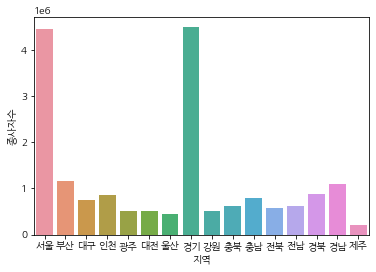

In [120]:
# 시도별 고용자수를 막대그래프로 그리기
sns.barplot(x='지역',y='종사자수', data=df);

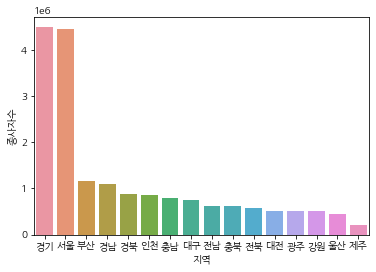

In [121]:
# 고용자수 높은 시도부터 도표
df.sort_values('종사자수', ascending=False, inplace=True)
sns.barplot(x='지역', y='종사자수', data=df);

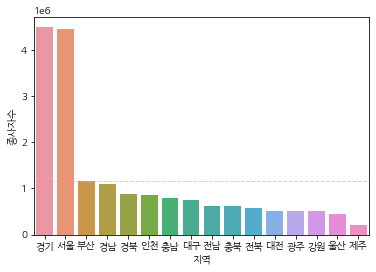

In [122]:
# 고용자수 높은 시도부터 도표 (평균 고용자수 라인 추가)
df.sort_values('종사자수', ascending=False, inplace=True)
sns.barplot(x='지역', y='종사자수', data=df);
df['종사자수'].mean()          #평균
plt.axhline(df['종사자수'].mean(), c='orange', lw=1, ls='--',alpha=.5);

In [123]:
# 세대수 대비 고용비율 컬럼 추가
df['세대수대비종사자비율'] = df['종사자수'] / df['세대수'] * 100
df.head()

,지역,세대수,종사자수,아파트매매가지수,세대수대비종사자비율
7,경기,5676401,4489283,114.683333,79.086784
0,서울,4417954,4463444,140.516667,101.029662
1,부산,1530431,1169184,98.241667,76.395734
14,경남,1484601,1105881,87.516667,74.490116
13,경북,1254662,876305,88.575000,69.843910


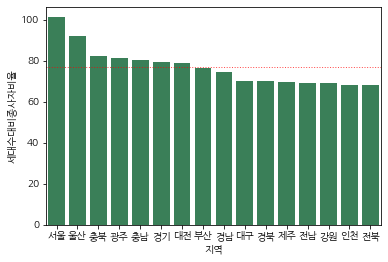

In [124]:
# 시도 단위 세대수 대비 고용비율 도표
df.sort_values('세대수대비종사자비율', ascending=False, inplace=True)
sns.barplot(x='지역', y='세대수대비종사자비율', data=df, color='seagreen')
plt.axhline(y=df['세대수대비종사자비율'].mean(), c='red', lw=1, ls=':',alpha=.7);

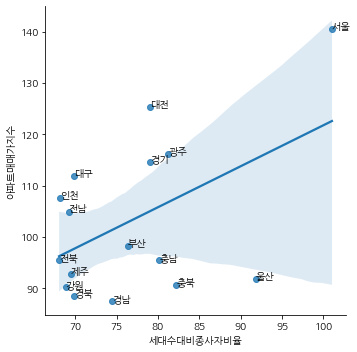

In [125]:
# 세대수 대비 고용률과 아파트 매매가지수 회귀도표
sns.lmplot(x='세대수대비종사자비율', y='아파트매매가지수', data=df);
for i in range(df.shape[0]):
    plt.text(x=df['세대수대비종사자비율'][i], y=df['아파트매매가지수'][i], s=df['지역'][i]);

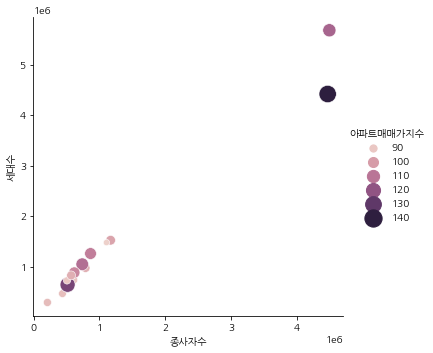

In [126]:
# 시도별 고용자수, 세대수를 아파트 매매가지수와 함께 살펴보기
sns.relplot(kind='scatter', data=df, x='종사자수', y='세대수', 
            hue='아파트매매가지수', 
            size='아파트매매가지수', sizes=(40,300));